# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [35]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [36]:
minimum_price = prices.min()

maximum_price = prices.max()

mean_price = prices.mean()

median_price = prices.median()

std_price = prices.std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165340.27765266784


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer:** Here are my thoughts on the effect that a change in the value of each feature in the dataset should/would have on the value of house:

* `'RM'`: If we consider `'LSTAT'` and `'PTRATIO'` to be constant then a larger number of rooms should signal a higher median value of a house simply because if we have more rooms we are very likely to have a larger houses (on average) which should cost more because of houses normally being priced according to size in sq. metres or sq. feet (it is important to note that we are considering two areas with same/similar `'LSTAT'` and `'PTRATIO'` to have other variables not affect the price). Conversely, a decrease in the average number of rooms should signal a decrease in the median prices of houses in the neighbourhood.
* `'LSTAT'`: **Lower class** is a fairly general term which is generally meant to signal a person who does not have the most prestigious social standing. Since a lot of social standing has to do with money we will assume that someone who is **lower class** is likely to be less wealthy than someone who is considered to be **high class**. This means that if `'LSTAT'` is high (meaning the number of lower class people in the neighbourhood is high) then it is likely that the median value of a house in that region will be cheaper than houses in another neighbourhood which has a lower percentage of **lower class** residents.
* `'PTRATIO'`: If the ratio of students to teachers is really high it might signal that there are public schools in the area and not private schools. Conversly, a smaller students to teacher ratio signals at their being private schools or more selective schools in the area. Generally schools which provide more care/resources to students charge more and this signals that the people in that neighbourhood are able to pay the higher fees leading me to think that they would also be able to invest a higher amount of money on their houses. Thus, a lower `'PTRATION'` probably signals higher median prices for houses.

Here are some graphs that try to justify my claims:

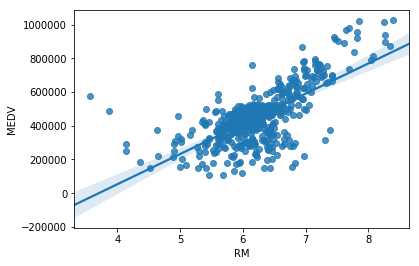

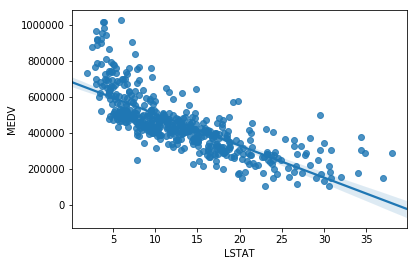

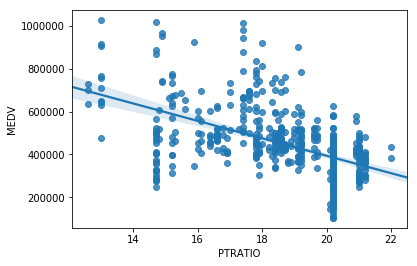

In [37]:
import matplotlib.pyplot as plt
import seaborn

for feature in ['RM', 'LSTAT', 'PTRATIO']:
    seaborn.regplot(data[feature], prices, )
    plt.show()

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [38]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Use the scorer to find the score
    score = r2_score(y_true, y_predict)
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [39]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:** The $R^2$ score tries to capture how well the data is fitted to the regression line. In general, a higher $R^2$ squared is considered to signal that a model is able to capture the variation of the target variable quite well. I think an $R^2$ score of 0.923 indicates that the model is extremely successful in capturing the variation of the target variable around its mean (since the maximum $R^2$ score is 1). This means that the model is able to account for a large percentage of the variance of the target variable (dependent variable, Y) from the features (independent variable, y). Thus, my answer to the question would be yes, due to the $R^2$ score being very close to 1.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [40]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, train_size = 0.80, test_size = 0.20, random_state = 42)

print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer:** We should never test a machine learning model on its training set and splitting the data in training and trst set allows us to learn on some data (the training set) and test our model on the rest of the data (the test set). The training set allows us to be able to increase the complexity of the model until it does well on the training data so that we know for sure that the model is not too simple (underfits) for the data. It is entirely possible that during this increase in complexity of the model we made it too complex such that it is bound to do well on the training data because not only has the model learnt how to extract general characterisitics of the data but it has also learnt the quirks (noise) of the training data (We don't want to do this! We want our models to generalise as well as possible). Having a test set with which we can test our model and verify that the sort of results we get on the training data are similar to the ones we get on the test data. This would mean that our model has just the right amount of complexity to represent the data. If we only had a training set then an overfit model would probably look better than a more general model but in practice it would fail because it is too specific to the training set.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

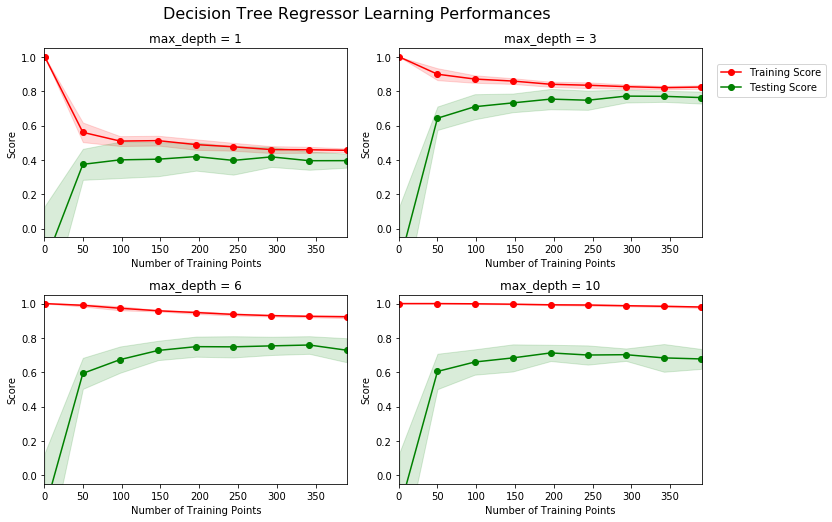

In [41]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer:** I think a good maximum depth of the model would be 3. As the number of training examples at depth 3 increases the training score seems to be decreasing (more errors because there are more data points) and the test score seems to be increasing (because the model has more data to train from so is more infromed). For depth 3 the training and test curves look very likely to converge at some point (which is what we want). At depth 6 (this also applies to higher depths) the training and test curves become almost parallel when training data size is > 300 meaning that they are probably overfitting and are unlikely to converge. I think at some point having too many training examples compromises on the number of test examples. We want to have enough test examples for us to be able to make sure that our model is good for the data in general and if we have too few test examples then we might be missing out on a certain type of data that our model might not be very good at predicting.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

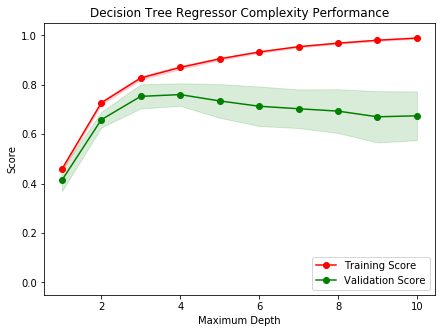

In [42]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer:** When the model is trained with a maximum depth of **1** the model suffers from underfitting or **high bias** since it performs badly on the training and the test data as we can see from the graph. When the model is trained with a maximum depth of **10** it suffers from overfitting or **high variance** we can see that from the shaded region for the validation score being quite large (thus, higher standard deviation and variance) and also from the fact that the model does well on the training set but not on the test set. So a model with max depth 10 probably overfits the training data. 

This is also obvious from the fact that the model at depth 1 is simple so is likely to underfit. Whereas the model at depth 10 is likely to be over the top for a dataset with just 3 features.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer:** I think a maximum depth 4 leads to the best and most general model. I chose this model for a couple of reasons:

* The model at depth 4 has the highest validation score and it drops off after depth 4 meaning the model probably starts overfitting after depth 4. Similarly for depth < 4 the validation score increases with an increase in max. depth meaning that lower depth models may be too simple for the given data.
* Another reason I thought the max. depth of the model should be 4 is because of the number of features in the dataset. If there are only 3 features in a dataset then having a decision tree with a max_depth that splits more than 3-4 times may start to get a little bit too specific and overfit the training data.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer:** The grid search technique is a method used to optimize the hyperparameters of a learning algorithm. The hyperparameters specify at a high level an algorithm's complexity or its ability to learn. Grid searh works by asking the programmer to specify possible values for a set of hyperparamters and it then exhaustively searches all possible combinations of a these hyperparamters in order to arrive at the best possible answer. Let us say we have h hyperparameters with at most n possible values then the complexity of grid search would be **O(n^h)** for one complete pass of the grid search algorithm. The grid search is typically guided by an evaluation metric like the F1 score or Accruacy which we want to optimise through K-fold cross validation on the training data (and then taking the average of the answers from the cross validation). Thus, the combination of paramters which gives the best result for the specified evaluation metric is chosen as the best one. 

As described earlier a Grid Search along with a set of hyperparamters and their possible values could be used to find the combination of hyperparamters that gives us the best result on a training set (the best is judged by the evaluation metric and cross validation is generally used). If we only have two hyperparamters then the rows could be thought of one hyperparameter and the columns as the other hyperparamter such that each unique combination of rows and columns forms a value in a grid (and we search through all values in the grid). For example, in the examples given above we want to find the best max. depth of the decision tree where the max. depth of the tree is an hyperparamter, similarly the number of leaves in a decision tree is also a hyperparameter.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer:** In k-fold cross-validation the data is shuffled (to remove any bias) and divided into k equal parts. The k-fold cross validation technique is then run k times (iterations i go from 1 to k). At iteration i the subpart i of the dataset is used as our test set and the other k - 1 parts are used as the training set. This allows for us to be able to use all the data for training and also make sure that our model does well for a number of possible test sets rather than just one test set. 

When doing a grid search if we used just one test set for validation it is completely possible that the model the grid search found to be the best might just be really goood for that test set (and average or even worse below average for other test sets) but our objective is find a model which is extremely good on any test set from the given data set. Thus, doing cross validation where we can choose different test sets to validate and then average out the value of the evaluation metric from these cross validation steps allows us to find a model with hyperparameters in which we have more confidence. 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()
    params = {'max_depth' : list(range(1, 11))}
    scoring_fnc = make_scorer(performance_metric)

    # GridSearch (estimator, param_grid, scoring, cv) 
    # which have values 'regressor', 'params', 'scoring_fnc', 
    # and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [44]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer:** The best maximum depth according to GridSearch is actually 4. This is in line with our educated guess in **Question 6**.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 : |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [45]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer:** According to our model we should suggest the following prices to the customers:

| Client | Prediced Price |
| :---: | :---: |
| Client 1 | \$403,025.00 |
| Client 2 | \$237,478.72 |
| Client 3 | \$931,636.36 |

Yes, the prices seem reasonable for each of the clients. Let us look at the prices of houses with respect to the three features in the graphs below and reason our answer for each client:

* __Client 1__ - Client 1 has 5 rooms where the median price of houses in neighbourhoods with 5 rooms on avg. seems to a little bit over \$200,000 according to a model that just fits the data on the basis of the no. of rooms (1st graph below). Our price is quite a bit higher than the \$200,000 mark but this can be explained due to the LSTAT where houses in neighbourhoods with LSTAT of around 17\% seem to cost right in the \$400,000 range (according to the graph that fits prices according to LSTAT only, 2nd graph below). Moreover, the PTRATIO is 17-to-1 for which the price in our PTRATIO graph (3rd graph below) seems to be around \$600,000 which is quite a bit higher than our predicted price. But if we think of all the features to be of equal importance we can see that the value of the house should be around the \$400,000 mark when averaged across all the features.

* __Client 2__ - Client 2 has 4 rooms and the predicted median price of house with 4 rooms is meanT to be around a \$100,000 (in graph 1 below). This again is quite a bit less than the price our model predicted but looking at LSTAT we see that 32\% LSTAT signals that a house should cost around \$200,000 (from Graph 2 below) which is right around the price we predicted. Moreover, looking at the PTRATIO of 22-to-1 the houses in such a region can cost up to \$400,000 (from Graph 3 below). Again taking the average we can clearly see that the predicted price seems to land us right where our decision tree model said we would arrive at in the first place.

* __Client 3__ - Client 3 has a house with 8 rooms. Our predicted price using the 1st graph below is \$800,000. They also have a very low LSTAT of 3\% and we can see that the prices of houses with very low LSTAT seems to shoot up quite fast from the 2nd graph in the cell below. This might be due to the prestige of the areas or the fact that the communities are gated (thus costing a lot more). Our graph thinks it should still cost around \$700,000 (but the actual cost is quite a bit higher due to the price not exhibiting a linear behaviour at the higher end of pricing). Again, when we look at PTRATIO our graph below says that the house should be worth \$700,000. So our average predicted house price would around $750,000 but as can be seen from the graphs below that more prestigious communities with the best schools seem to charge a premium (and deviate from linear behaviour that is assumed in our reg plots). Surprisingly our decision tree model is able to capture that quite well and predict a price which I think is pretty close to perfect answer 

All of the observations above are in line with what we saw in the data exploration section wherein:

* Increase in RM      => Increase in price.
* Increase in LSTAT   => Decrease in price.
* Increase in PTRATIO => Decrease in price.

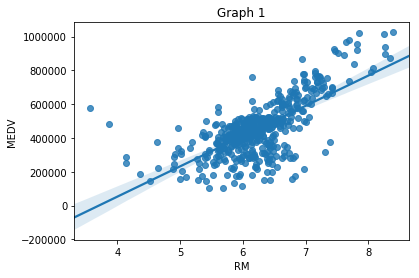

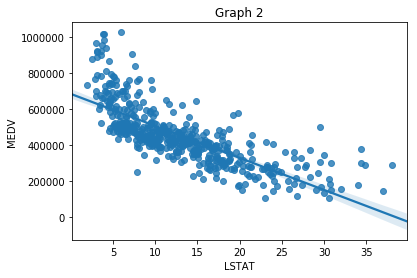

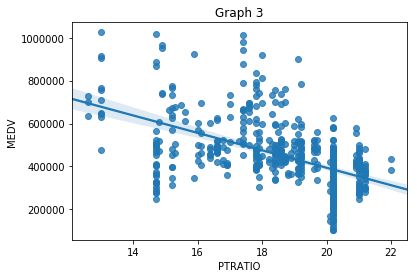

In [49]:
import matplotlib.pyplot as plt
import seaborn
i = 1
for feature in ['RM', 'LSTAT', 'PTRATIO']:
    seaborn.regplot(data[feature], prices).set_title(f'Graph {i}')
    i += 1
    plt.show()

### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:** I don't think the constructed model should be used in a real world setting. 

It uses too few features to predict the price of a house in Boston. Moreover, the data the model used to learn is from a really long time in the past and although the prices are scaled for inflation that does not account for the change in the social and economic outlook of the people. For example, due to the prevalance of good public transport and more cars the existence of a good school in the neighbourhood might not be the most pressing concern for people buying houses anymore. Moreover, the price of a house is dependent on the size of the houses which is not always directly proportional to the number of rooms in the house. A house might have less rooms but might have a large front/back yard or a pool which might increase its price quite a bit. To add, a large cost might be added or subtracted from the price of a house based on whether the house comes furnished or not. 

The dataset will not be able to make consistent predictions for more current data or for houses/datasets that need to factor in any of the reasons mentioned above. It might do well on datasets that are simple are fairly abstracted but is bound to fail in a real-word scenario.
    
The data collected for Boston would by no means be applicable to a rural city because the outlook in a rural city might be very different from the outlook in Boston. Rural cities don't tend to have people who want flashy features like a NBA sized basketball court or a olympic swimming pool but people in a city may care about (and thus, be willing to pay a premium for the same). The data from Boston would help the algorithms learn features that might be completely irrelevant to a rural area. 

I also don't think it is completely fair to judge the price of a home based on the characteristics of the entire neighbourhood only. I think a good set of features would contain a combination of features such that some features represent the home to be able to quantify its *goodness* and other features should be about the neighbourhood so as to be able to quantify how much a good home in that neighbourhood should cost.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.